In [1]:
import pickle
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as sc
from statistics import median, mean, stdev, mode
from scipy.signal import find_peaks, peak_prominences, peak_widths
import scipy.integrate as integrate
import scipy.special as special
import seaborn as sns
import os
from pid_functions import*
sns.set_context('talk')

In [32]:
path = os.getcwd() + '/PID/20250623/'
filename = '5perc_ev_task_pump_high_cl_94_0.h5'
filepath = path + filename
print(filepath)
dfile = h5py.File(filepath,'r')
print(list(dfile['measurement'].keys())[0]) #['measurement'].keys()
data = dfile['measurement/block_training/buffer'][:] #load data buffer to numpy arrray
stat = dfile['measurement/block_training/stat'][:] #load task statistics
side_stat = dfile['measurement/block_training/side_stat'][:]  #load task statistics with side information
settings = dfile['measurement/block_training/settings'].attrs

/Users/boero/OEA_Data_Analysis/PID/20250623/5perc_ev_task_pump_high_cl_94_0.h5
block_training


30
2500


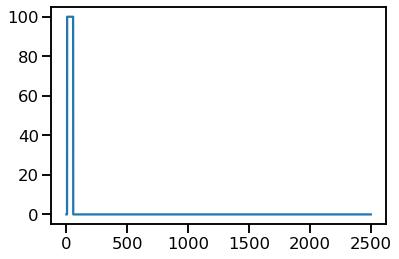

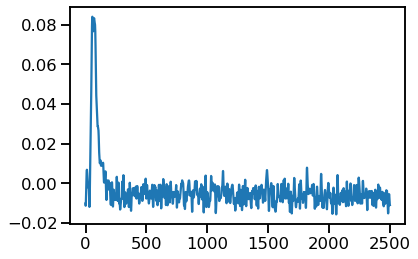

In [30]:
# Load raw data into numpy array
#breath = 0
lick0 = 1
lick1 = 2
PID_index = 3 # index number for PID signal
cl_air = 6 + 4 #index number of clean air channel in h5file
#odor_0 = 6 + 0
odor_1 = 6 + 7 #index number of odor channel 1 in h5file
#odor_2 = 6 + settings['channel2'] #index number of odor channel 2 in h5file
end_time = len(data) # in milisecond
delay_time = settings['delay'] #ms, delay time of the task
go_time = settings['go'] #ms, go time of the task
refract_time = settings['refract'] #ms, refraction period time of the task
pulse_time = 50
ntrials = np.argwhere(np.diff(data[:,cl_air]) == -100).shape[0]

PID_signal = data[0:end_time,PID_index]
filt_signal = bp_filter(PID_signal-np.median(PID_signal))
odor_profile_1 = data[0:end_time,odor_1]

print(ntrials)

total_time = delay_time + go_time #ms, the total time that we are analyzing for each trial
print(total_time)
onset = np.argwhere(np.diff(data[:,cl_air]) == -100).reshape(ntrials,1) #find out hte onset of each trial
interval = np.arange(total_time).reshape(1,total_time) #define a interval to extract for each trial
refract_interval = np.arange(refract_time)[::-1].reshape(1,refract_time) # define a interval for pretrial, flipped
trial_inds = onset + interval #get the indices for all the wanted data for all trials
pre_inds = onset - refract_interval #get the indices for all the wanted data in all pre-trials

# get all the trial informations
trial_odor = data[:,odor_1][trial_inds[:-1,:]]
PID = PID_signal[trial_inds[:-1,:]]
PID_filt = filt_signal[trial_inds[:-1,:]]

#Assigning identity to the different channels 

plt.plot(trial_odor[11])
plt.show()
plt.plot(PID_filt[11])
plt.show()

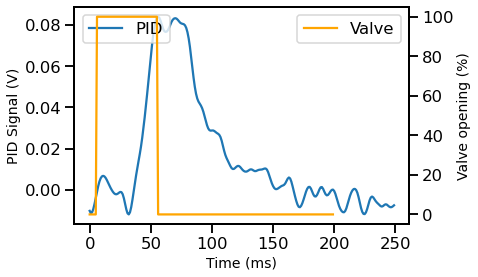

In [31]:
trial = 11

fig,ax=plt.subplots()

ax.plot(PID_filt[trial,0:250], label='PID')
#ax.plot(trial_odor[4,1650:1900]/500)
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('PID Signal (V)', fontsize=14)
plt.legend(loc='upper left')
ax2=ax.twinx()
ax2.plot(trial_odor[trial,0:200], color='orange', label='Valve')
ax2.set_ylabel('Valve opening (%)', fontsize=14)
plt.legend()
plt.show()
#plt.savefig('new_PID_trace.svg', format='svg', transparent='True')

In [70]:
path = os.getcwd() + '/PID/20211119/'
filename = 'low_pulses_2_2.h5'
filepath = path + filename
dfile = h5py.File(filepath,'r')
data = dfile['measurement/block_training/buffer'][:] #load data buffer to numpy arrray
stat = dfile['measurement/block_training/stat'][:] #load task statistics
side_stat = dfile['measurement/block_training/side_stat'][:]  #load task statistics with side information
settings = dfile['measurement/block_training/settings'].attrs

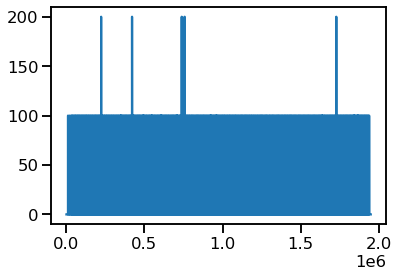

In [73]:
plt.plot(data[:,6])

In [75]:
# Load raw data into numpy array
#breath = 0
lick0 = 1
lick1 = 2
PID_index = 3 # index number for PID signal
cl_air = 6 + 4 #index number of clean air channel in h5file
#odor_0 = 6 + 0
odor_1 = 6 + 0 #index number of odor channel 1 in h5file
#odor_2 = 6 + settings['channel2'] #index number of odor channel 2 in h5file
end_time = len(data) # in milisecond
delay_time = settings['delay'] #ms, delay time of the task
go_time = settings['go'] #ms, go time of the task
refract_time = settings['refract'] #ms, refraction period time of the task
pulse_time = 50
ntrials = np.argwhere(np.diff(data[:,cl_air]) == -94).shape[0]

PID_signal = data[0:end_time,PID_index]
filt_signal = bp_filter(PID_signal-np.median(PID_signal))
odor_profile_1 = data[0:end_time,odor_1]

print(ntrials)

total_time = delay_time + go_time #ms, the total time that we are analyzing for each trial
print(total_time)
onset = np.argwhere(np.diff(data[:,cl_air]) == -94).reshape(ntrials,1) #find out hte onset of each trial
interval = np.arange(total_time).reshape(1,total_time) #define a interval to extract for each trial
refract_interval = np.arange(refract_time)[::-1].reshape(1,refract_time) # define a interval for pretrial, flipped
trial_inds = onset + interval #get the indices for all the wanted data for all trials
pre_inds = onset - refract_interval #get the indices for all the wanted data in all pre-trials

# get all the trial informations
trial_odor = data[:,odor_1][trial_inds[:-1,:]]
PID = PID_signal[trial_inds[:-1,:]]
PID_filt = filt_signal[trial_inds[:-1,:]]


322
2500


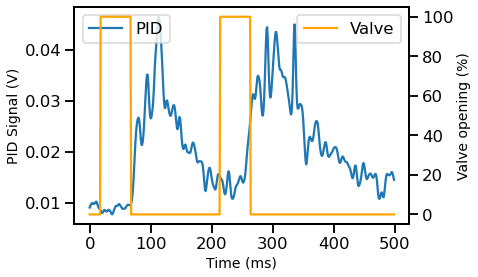

In [83]:
trialn = 25

fig,ax=plt.subplots()
ax.plot(PID_filt[trialn,0:500], label='PID')
#ax.plot(trial_odor[4,1650:1900]/500)
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('PID Signal (V)', fontsize=14)
plt.legend(loc='upper left')
ax2=ax.twinx()
ax2.plot(trial_odor[trialn,0:500], color='orange', label='Valve')
ax2.set_ylabel('Valve opening (%)', fontsize=14)
plt.legend()
plt.show()
#plt.savefig('new_PID_trace.svg', format='svg', transparent='True')

-0.6855624327627978
[20.61703734342653, 17.41630087395879, 39.230677329914755, 16.381207658419328, 50.6878734709685, 36.55932614344192, 20.19201613124119, 15.873520502697147, 47.369725809081274, 16.184381396617482, 36.52415799784626, 17.63184649885352, 27.091635359282918, 15.102389938916076, 15.525338577860111, 20.168286846101182, 18.00469735791785, 26.239327332709763, 62.056212075289295, 52.08833077163035, 20.533678427583254]
[30.4261936125898, 23.47349447916622, 17.684734271533756, 21.600323617835954, 15.240617605432021, 15.82434583374544, 15.498139743705565, 25.40413269899352, 67.90699308947751, 27.347102340373112, 19.915504467546043, 19.42840779953258, 33.94730292959548, 40.37888743886833, 18.749978225556106, 15.976674779790756, 44.58843051160147, 32.88381453271768, 76.92464417218434, 22.463498231288668, 34.29550019279077, 22.4243527492863, 18.73995881976998, 36.89439321281634, 16.450233502560422, 31.608686192184905, 28.318018317434507, 17.535177023498363, 21.755110948041875, 18.75

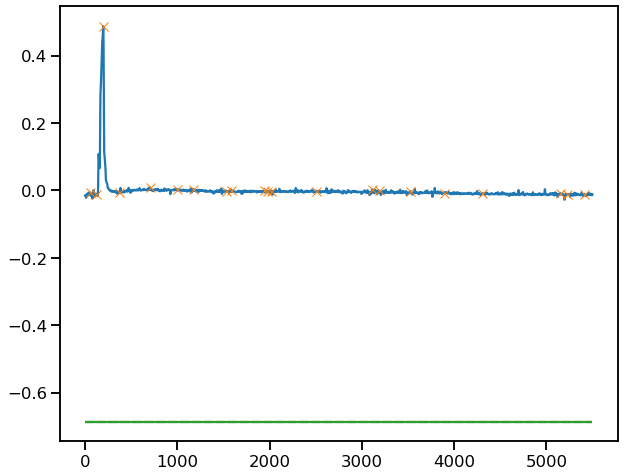

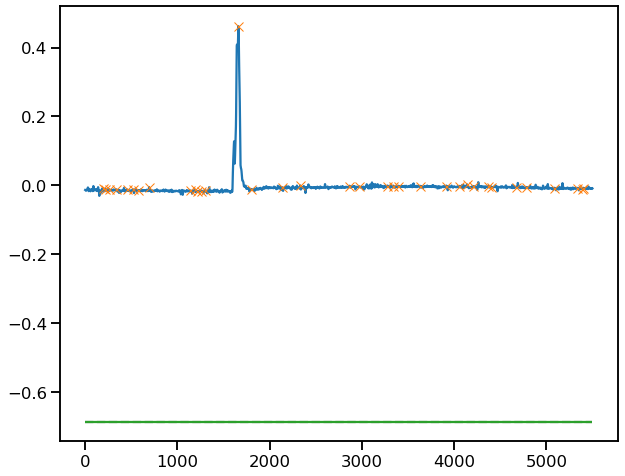

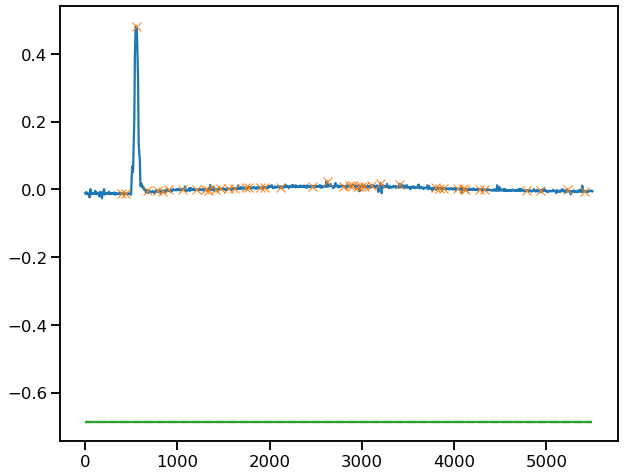

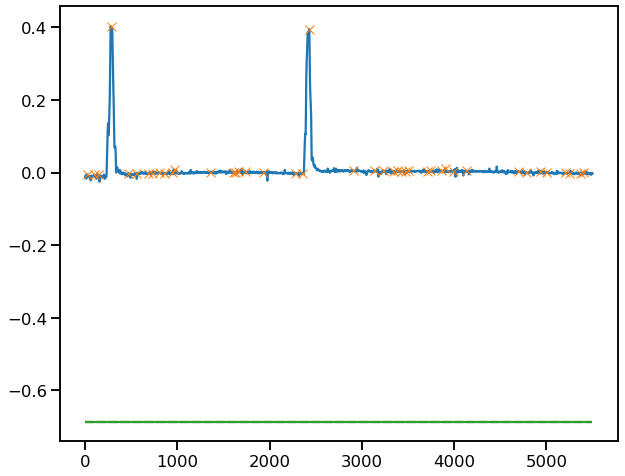

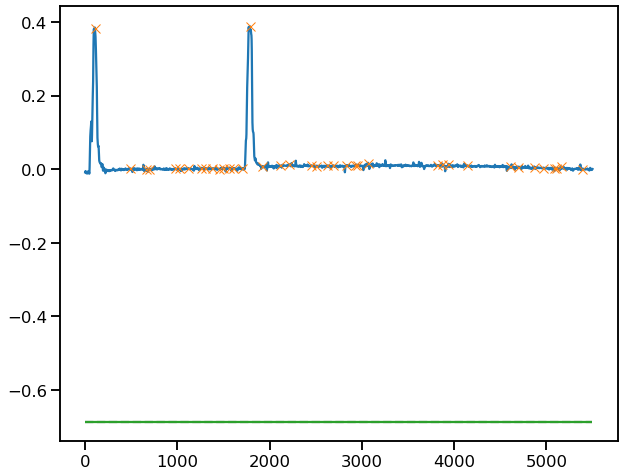

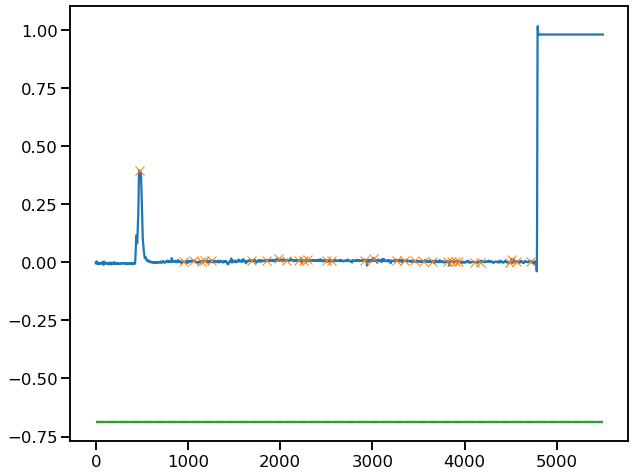

In [4]:
#good_trials = [15,19,20,24,26,27,34] #20,
threshold = height_threshold(PID, 0, 40000, 2)
print(threshold)
good_blanks = list()
good_whiffs = list()
rise_times = list()
halves = list()
fullw = list()

for trial in range(len(PID)):
    hw, rts, fw =  peak_parameters(PID_filt[trial],threshold)
    whiffs, blanks =  peak_blank_analyzer(PID_filt[trial],threshold)
    print(hw)

    halves.append(hw)
    good_whiffs.append(whiffs)
    good_blanks.append(blanks)
    rise_times.append(rts)
    fullw.append(fw)

    #plt.plot(fig)

print(halves)
halfwidths_list = flatten(halves)
fullwidths_list = flatten(fullw)
good_blanks_list = flatten(good_blanks)
good_whiffs_list = flatten(good_whiffs)
rise_times_list = flatten(rise_times)

{'whiskers': [<matplotlib.lines.Line2D at 0x1442023a0>,
 'caps': [<matplotlib.lines.Line2D at 0x144202820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1442020d0>],
 'medians': [<matplotlib.lines.Line2D at 0x144202dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1441f50d0>],
 'means': []}

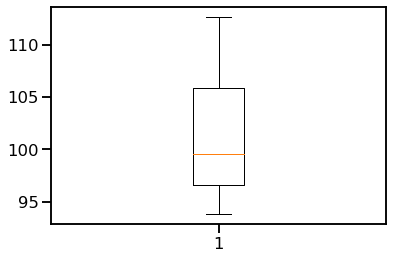

In [205]:
plt.boxplot(fullwidths_list)

{'whiskers': [<matplotlib.lines.Line2D at 0x1111d4670>,
 'caps': [<matplotlib.lines.Line2D at 0x13ff14a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1410a08e0>],
 'medians': [<matplotlib.lines.Line2D at 0x13ff149a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ff14e50>],
 'means': []}

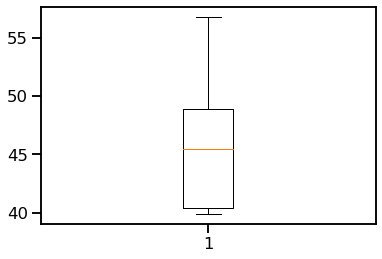

In [33]:
plt.boxplot(halfwidths_list)

{'whiskers': [<matplotlib.lines.Line2D at 0x1445d64c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1445d6a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1445cc070>],
 'medians': [<matplotlib.lines.Line2D at 0x1445e4040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1445e4310>],
 'means': []}

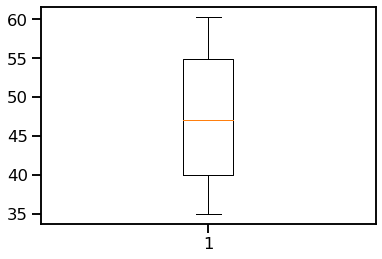

In [183]:
plt.boxplot(rise_times_list)

(array([ 1622, 10091, 15996, 22731, 24868, 29549, 31237, 36934]),)
[ 1694 10161 16061 22800 24920 29601 31281 36985]
[[72 70 65 69 52 52 44 51]]


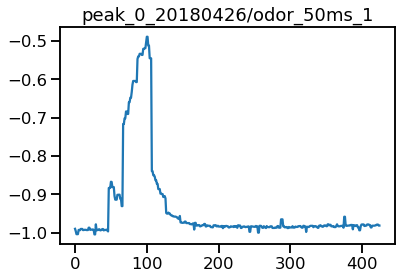

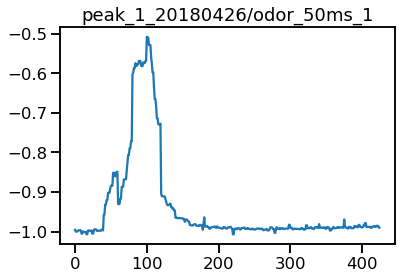

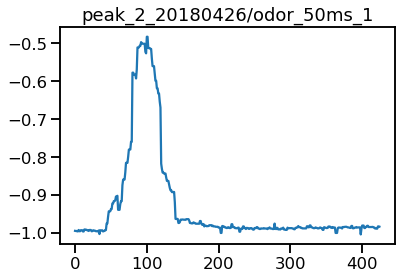

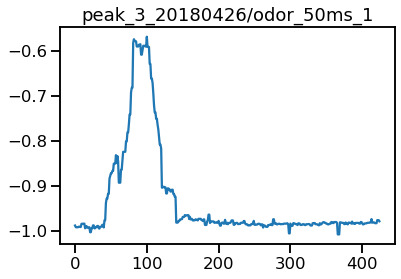

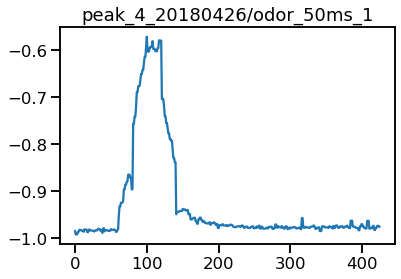

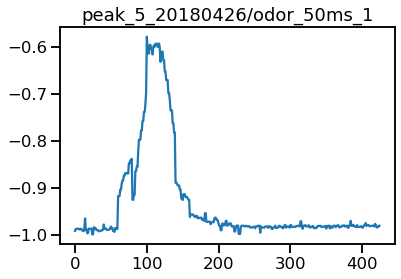

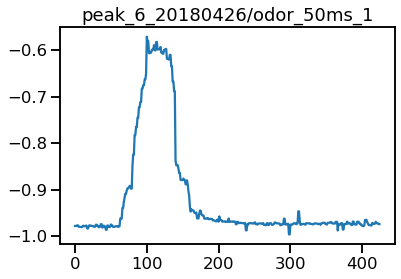

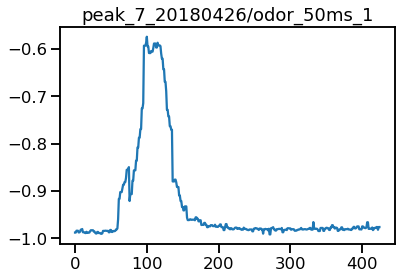

[[-0.9895823  -0.99575048 -1.00354187 ... -0.97854451 -0.98114164
  -0.98114164]
 [-0.9951012  -0.99964617 -0.99964617 ... -0.98503733 -0.9895823
  -0.9895823 ]
 [-0.99445192 -0.99477656 -0.99477656 ... -0.98276485 -0.98276485
  -0.98341413]
 ...
 [-0.99217943 -0.9879591  -0.9879591  ... -0.98438805 -0.98114164
  -0.98114164]
 [-0.97821987 -0.97821987 -0.97821987 ... -0.97237634 -0.97432418
  -0.97432418]
 [-0.98763446 -0.98763446 -0.98373877 ... -0.98179092 -0.97594739
  -0.97594739]]
(425,)


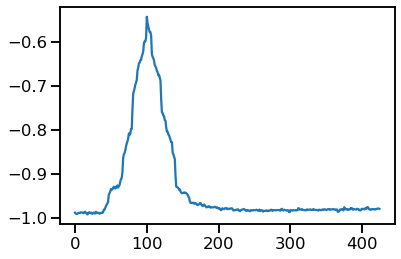

In [192]:
#Extracting single peaks for average kernel estimation

odor_onsets = np.where(np.diff(data[:,odor_1])==100)
PID_peaks = find_peaks(data[:40000,0], height=-0.7, distance=300)[0]
print(odor_onsets)
print(PID_peaks)
onset_peak_delay = PID_peaks-odor_onsets
print(onset_peak_delay)

# Window size parameters
test_data = data[:40000,0]
window_size = 425
rise_part = 100
decay_part = 325
#half_window = window_size // 2

# List to store each subset
subsets = []

for idx in PID_peaks:
    # Define the start and end of the window around each index
    start = max(idx - rise_part, 0)  # Ensure the start is not negative
    end = min(idx + decay_part, len(test_data))  # Ensure the end does not exceed data length

    # Extract the subset and store it
    subset = test_data[start:end]
    
    # If the extracted subset is less than the window size, pad it (optional)
    if len(subset) < window_size:
        subset = np.pad(subset, (0, window_size - len(subset)), 'constant', constant_values=0)
    
    subsets.append(subset)

# Convert to a NumPy array if desired, with shape (10, 200)
subsets = np.array(subsets)
for i in range(len(subsets)):
    plt.plot(subsets[i])
    plt.title('peak_'+str(i)+'_20180426/odor_50ms_1')
    plt.savefig('PID_pulse_'+str(i)+'.svg', format='svg', bbox_inches='tight')
    plt.show()

mean_peak = subsets.mean(0)

print(subsets)  # Should be (10, 200)
print(mean_peak.shape)
plt.plot(mean_peak)

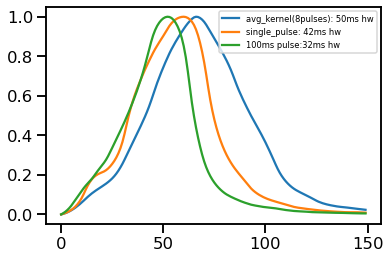

In [182]:
old_kernel = np.load('odor_kernel_50ms.npy')
data_selection = mean_peak
peak_index = np.argwhere(data_selection==data_selection.max())[0][0]
a = data_selection[peak_index-100:peak_index]
b = data_selection[peak_index:peak_index+325]
c = np.concatenate((a,b))
avg_kernel = butter_lowpass_filter(c, cutoff=30, fs=1000, order=1)
base = butter_lowpass_filter(c, cutoff=.2, fs=1000, order=1)
avg_kernel = avg_kernel - base
avg_kernel = avg_kernel[35:185]
avg_kernel = avg_kernel - avg_kernel.min()
avg_kernel = avg_kernel/avg_kernel.max()
plt.plot(avg_kernel)
plt.plot(kernel)
plt.plot(old_kernel)
plt.legend(['avg_kernel(8pulses): 50ms hw','single_pulse: 42ms hw','100ms pulse:32ms hw'], fontsize='small', loc='best')
plt.show()


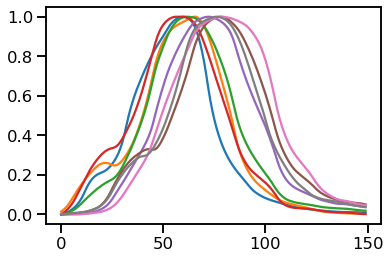

In [170]:
# List to store each subset
ind_kernels = []
data_selection = data[:40000,0]

for idx in PID_peaks:

    a = data_selection[idx-100:idx]
    b = data_selection[idx:idx+325]
    c = np.concatenate((a,b))
    k = butter_lowpass_filter(c, cutoff=30, fs=1000, order=1)
    base = butter_lowpass_filter(c, cutoff=.2, fs=1000, order=1)
    k = k - base
    k = k[35:185]
    k = k - k.min()
    k = k/k.max()
    ind_kernels.append(k)
    plt.plot(k)
    # Define the start and end of the window around each index
    # start = max(idx - rise_part, 0)  # Ensure the start is not negative
    # end = min(idx + decay_part, len(test_data))  # Ensure the end does not exceed data length

    # Extract the subset and store it
    # subset = test_data[start:end]
    
    # If the extracted subset is less than the window size, pad it (optional)
    # if len(subset) < window_size:
    #     subset = np.pad(subset, (0, window_size - len(subset)), 'constant', constant_values=0)
    
    #subsets.append(subset)
plt.show()
k_array = np.array(ind_kernels)
print(k_array.mean(0))
plt.plot(k_array.mean(0))
plt.show()



In [189]:
peak_old = find_peaks(old_kernel, height=0.5, distance=100)[0]
peak_new = find_peaks(kernel, height=0.5, distance=100)[0]
peak_avg = find_peaks(avg_kernel, height=0.5, distance=100)[0]

halfwidths_old = peak_widths(old_kernel, peak_old, rel_height=0.5)[0]
halfwidths_new = peak_widths(kernel, peak_new, rel_height=0.5)[0]
halfwidths_avg = peak_widths(avg_kernel, peak_avg, rel_height=0.5)[0]

print(np.argwhere(old_kernel>0.9)[0][0], np.argwhere(kernel>0.9)[0][0], np.argwhere(avg_kernel>0.9)[0][0])
print(halfwidths_old, halfwidths_new, halfwidths_avg)


45 50 58
[32.4871099] [41.25772755] [50.62043216]


Text(100, 0.2, 'hw=32ms')

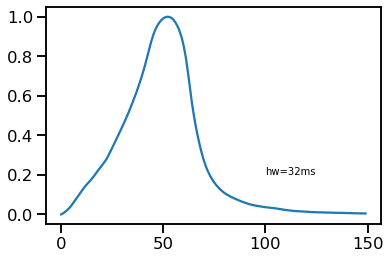

In [177]:
plt.plot(old_kernel)
plt.text(100,0.2,'hw=32ms')

Text(100, 0.2, 'hw=41.25ms')

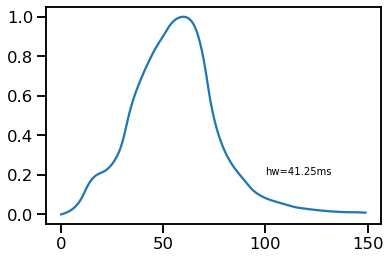

In [178]:
plt.plot(kernel)
plt.text(100,0.2,'hw=41.25ms')

Text(100, 0.2, 'hw=50.62ms')

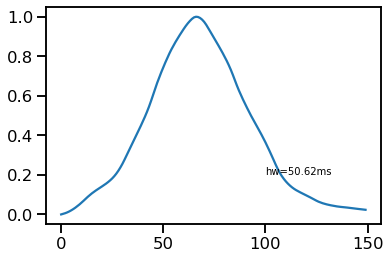

In [190]:
plt.plot(avg_kernel)
plt.text(100,0.2,'hw=50.62ms')

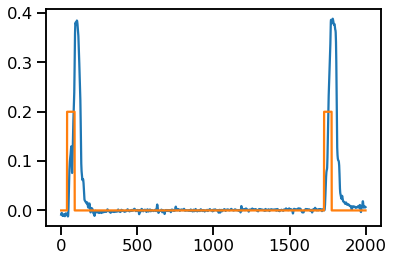

In [9]:
plt.plot(PID_filt[4,:2000])
plt.plot(trial_odor[4,:2000]/500)
plt.savefig('new_PID_trace.svg', format='svg', transparent='True')